In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,confusion_matrix,auc,precision_score,f1_score,accuracy_score
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings("ignore")



# 数据预处理
1. 利用转发数的中位数作为阈值，高于阈值的标记为1，即流行；低于阈值的标记为0，即不流行
2. 利用MinMaxScaler和StandardScaler进行数据预处理(少部分网络需要)

In [2]:
data = pd.read_csv('final.csv')
features = ['ori_follow','ori_bi'] + ['t' + str(i) for i in range(1,11)]+['bi'+ str(i) for i in range(1,11)]+['fo'+ str(i) for i in range(1,11)]
target = ['count']
X = data[features]
y= data[target]

threshold = (np.median(list(data['count'])))
data['count'][data['count']<=threshold]=0
data['count'][data['count']>threshold]=1

from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()
scaled_minmax_X = scaler_minmax.fit_transform(data[features])
scaled_std_X = scaler_std.fit_transform(data[features])


print('After deleting some date, the number of remaining data is ',len(data))
print('The threshold will set to ', threshold)
print('The ratio of positive and negative samples: ', list(data['count']).count(1)/list(data['count']).count(0))

After deleting some date, the number of remaining data is  156791
The threshold will set to  65.0
The ratio of positive and negative samples:  0.9979484173505275


# 利用不同模型，所有特征做预测

## Random Forest

Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

In [3]:
from sklearn.ensemble import RandomForestClassifier
features = ['ori_follow','ori_bi'] + ['t' + str(i) for i in range(1,11)]+['bi'+ str(i) for i in range(1,11)]+['fo'+ str(i) for i in range(1,11)]
target = ['count']
X = data[features]
y= data[target]

X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=11)

RF=RandomForestClassifier(n_estimators=50,random_state=11)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.6820
acc_score:0.7057
recall_score:0.6318
precision_score0.7409
confusion_matrix:
 [[15290  4326]
 [ 7211 12371]]


## Extra Trees classifier

The main difference between random forests and extra trees (usually called extreme random forests) lies in the fact that, instead of computing the locally optimal feature/split combination (for the random forest), for each feature under consideration, a random value is selected for the split (for the extra trees).
This leads to more diversified trees and less splitters to evaluate when training an extremly random forest.

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
features = ['ori_follow','ori_bi'] + ['t' + str(i) for i in range(1,11)]+['bi'+ str(i) for i in range(1,11)]+['fo'+ str(i) for i in range(1,11)]
target = ['count']
X = data[features]
y= data[target]

X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=11)

EXTC=ExtraTreesClassifier(n_estimators=50,random_state=11)
EXTC.fit(X_train,y_train)
y_test_pred = EXTC.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.6728
acc_score:0.7021
recall_score:0.6132
precision_score0.7454
confusion_matrix:
 [[15515  4101]
 [ 7575 12007]]


## Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [5]:
from sklearn.linear_model import LogisticRegression
features = ['ori_follow','ori_bi'] + ['t' + str(i) for i in range(1,11)]+['bi'+ str(i) for i in range(1,11)]+['fo'+ str(i) for i in range(1,11)]
target = ['count']
X = data[features]
y= data[target]

X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=11)

LR=LogisticRegression(random_state=11)
LR.fit(X_train,y_train)
y_test_pred = LR.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.5557
acc_score:0.5891
recall_score:0.5145
precision_score0.6042
confusion_matrix:
 [[13018  6598]
 [ 9508 10074]]


## Decision Tree Classifier
Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves).

In [6]:
from sklearn.tree import DecisionTreeClassifier
features = ['ori_follow','ori_bi'] + ['t' + str(i) for i in range(1,11)]+['bi'+ str(i) for i in range(1,11)]+['fo'+ str(i) for i in range(1,11)]
target = ['count']
X = data[features]
y= data[target]

X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=11)

DT=DecisionTreeClassifier(random_state=11)
DT.fit(X_train,y_train)
y_test_pred = DT.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.6320
acc_score:0.6318
recall_score:0.6328
precision_score0.6311
confusion_matrix:
 [[12372  7244]
 [ 7190 12392]]


## K-Nearest Neighbors
In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. However, KNN are usually not good in high dimension problems like this one, and usually need datas to be scaled.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
features = ['ori_follow','ori_bi'] + ['t' + str(i) for i in range(1,11)]+['bi'+ str(i) for i in range(1,11)]+['fo'+ str(i) for i in range(1,11)]
target = ['count']
X = data[features]
y= data[target]

X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=11)

KNN=KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)
y_test_pred = KNN.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.6231
acc_score:0.6197
recall_score:0.6292
precision_score0.6171
confusion_matrix:
 [[11971  7645]
 [ 7261 12321]]


# 利用不同特征(FR模型)
## 只用前n条微博的特征(n=10, 7, 4, 1)
### 用前10条微博的准确率

In [8]:
features = ['ori_follow','ori_bi'] + ['t' + str(i) for i in range(1,11)]+['bi'+ str(i) for i in range(1,11)]+['fo'+ str(i) for i in range(1,11)]
target = ['count']
X = data[features]
y= data[target]

X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=11)

clf=RandomForestClassifier(n_estimators=50,random_state=11)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.6820
acc_score:0.7057
recall_score:0.6318
precision_score0.7409
confusion_matrix:
 [[15290  4326]
 [ 7211 12371]]


### 用前7条微博的准确率

In [9]:
features = ['ori_follow','ori_bi'] + ['t' + str(i) for i in range(1,8)]+['bi'+ str(i) for i in range(1,8)]+['fo'+ str(i) for i in range(1,8)]
target = ['count']
X = data[features]
y= data[target]

X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=11)

clf=RandomForestClassifier(n_estimators=50,random_state=11)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.6517
acc_score:0.6836
recall_score:0.5927
precision_score0.7238
confusion_matrix:
 [[15188  4428]
 [ 7976 11606]]


### 用前4条微博的准确率

In [10]:
features = ['ori_follow','ori_bi'] + ['t' + str(i) for i in range(1,5)]+['bi'+ str(i) for i in range(1,5)]+['fo'+ str(i) for i in range(1,5)]
target = ['count']
X = data[features]
y= data[target]

X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=11)

clf=RandomForestClassifier(n_estimators=50,random_state=13)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.6155
acc_score:0.6554
recall_score:0.5520
precision_score0.6954
confusion_matrix:
 [[14881  4735]
 [ 8772 10810]]


### 用前1条微博的准确率

In [11]:
features = ['ori_follow','ori_bi'] + ['t' + str(i) for i in range(1,2)]+['bi'+ str(i) for i in range(1,2)]+['fo'+ str(i) for i in range(1,2)]
target = ['count']
X = data[features]
y= data[target]

X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=11)

clf=RandomForestClassifier(n_estimators=50,random_state=13)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.6070
acc_score:0.6388
recall_score:0.5584
precision_score0.6649
confusion_matrix:
 [[14106  5510]
 [ 8647 10935]]


## 用不同类型的特征
### 只用社交网络关系

In [12]:
from sklearn.ensemble import RandomForestClassifier
features = ['ori_follow','ori_bi'] + ['bi'+ str(i) for i in range(1,11)]+['fo'+ str(i) for i in range(1,11)]
target = ['count']
X = data[features]
y= data[target]

X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=11)

RF=RandomForestClassifier(n_estimators=20,random_state=11)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.5312
acc_score:0.5852
recall_score:0.4704
precision_score0.6101
confusion_matrix:
 [[13728  5888]
 [10370  9212]]


### 只用每条微博转发时间

In [13]:
from sklearn.ensemble import RandomForestClassifier
features =  ['t' + str(i) for i in range(1,11)]
target = ['count']
X = data[features]
y= data[target]

X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=11)

RF=RandomForestClassifier(n_estimators=20,random_state=11)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.6546
acc_score:0.6806
recall_score:0.6058
precision_score0.7119
confusion_matrix:
 [[14816  4800]
 [ 7719 11863]]


### 全用

In [14]:
from sklearn.ensemble import RandomForestClassifier
features = ['ori_follow','ori_bi'] + ['t' + str(i) for i in range(1,11)]+['bi'+ str(i) for i in range(1,11)]+['fo'+ str(i) for i in range(1,11)]
target = ['count']
X = data[features]
y= data[target]

X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=11)

RF=RandomForestClassifier(n_estimators=20,random_state=11)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.6684
acc_score:0.6957
recall_score:0.6138
precision_score0.7336
confusion_matrix:
 [[15252  4364]
 [ 7563 12019]]


# 数据特征重要性排序

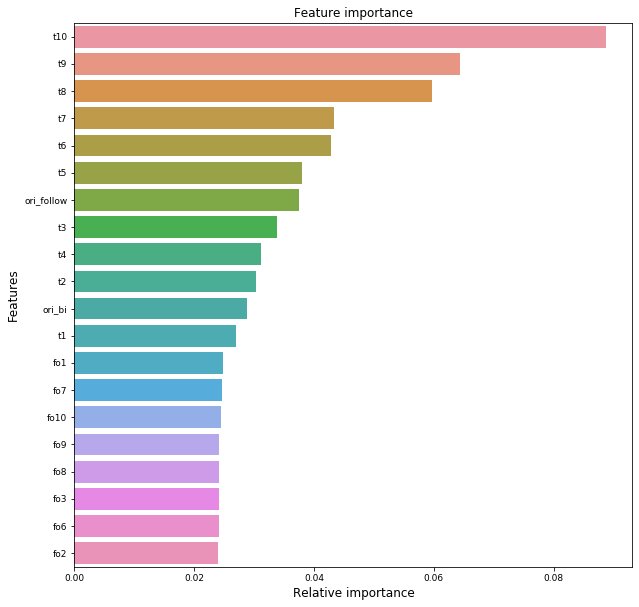

In [15]:
plt.figure(figsize=(10,10))

name = "Random Forest"
classifier = RF
indices = np.argsort(classifier.feature_importances_)[::-1][:20]
g = sns.barplot(y=X_train.columns[indices][:20],x = classifier.feature_importances_[indices][:20] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Feature importance")
plt.show()

# 数据降维

In [16]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
features = ['ori_follow','ori_bi'] + ['t' + str(i) for i in range(1,11)]+['bi'+ str(i) for i in range(1,11)]+['fo'+ str(i) for i in range(1,11)]
target = ['count']
X = data[features]
y= data[target]
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
X_train, X_test,y_train,y_test = train_test_split(X_pca,y,random_state=1234)
RF=RandomForestClassifier(n_estimators=50,random_state=11)
RF.fit(X_train,y_train)
y_test_pred = RF.predict(X_test)

print("f1_score:%.4f"%f1_score(y_test, y_test_pred))
print("acc_score:%.4f"%accuracy_score(y_test, y_test_pred))
print("recall_score:%.4f"%recall_score(y_test, y_test_pred))
print("precision_score%.4f"%precision_score(y_test, y_test_pred))
print("confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

f1_score:0.6929
acc_score:0.7074
recall_score:0.6634
precision_score0.7251
confusion_matrix:
 [[14794  4905]
 [ 6563 12936]]


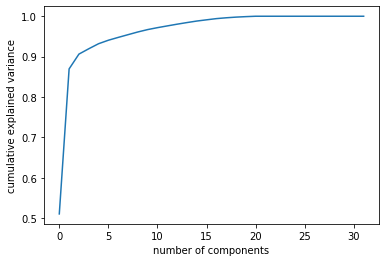

In [17]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([0.51062626, 0.86962122, 0.90627918, 0.9194667 , 0.93198412,
       0.94060352, 0.94760291, 0.95436175, 0.96105891, 0.96696928,
       0.9717447 , 0.97606676, 0.98033573, 0.98432015, 0.98810489,
       0.99114987, 0.99412477, 0.99617628, 0.99783488, 0.99903048,
       0.99999997, 0.99999998, 0.99999998, 0.99999998, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        ])

pca.explained_variance_ratio_=        
array([0.51062626, 0.86962122, 0.90627918, 0.9194667 , 0.93198412,
       0.94060352, 0.94760291, 0.95436175, 0.96105891, 0.96696928,
       0.9717447 , 0.97606676, 0.98033573, 0.98432015, 0.98810489,
       0.99114987, 0.99412477, 0.99617628, 0.99783488, 0.99903048,
       0.99999997, 0.99999998, 0.99999998, 0.99999998, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        ])

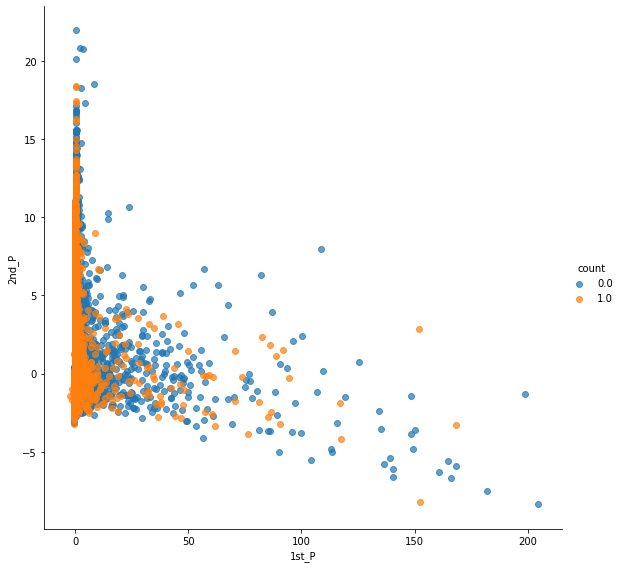

In [19]:
pca = PCA(2)
pca_data = pca.fit_transform(scaled_std_X)
new_data = np.vstack((pca_data.T,np.array(y).reshape(1,-1))).T
new_df = pd.DataFrame(data = new_data,columns=('1st_P','2nd_P','count'))
import seaborn as sns
sns.FacetGrid(new_df,hue='count',height = 8).map(plt.scatter,'1st_P','2nd_P',alpha=0.7).add_legend()

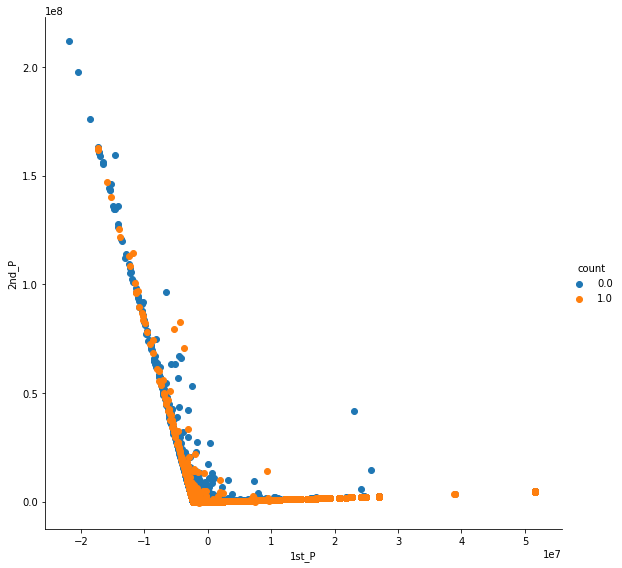

In [20]:
pca = PCA(2)
pca_data = pca.fit_transform(X)
new_data = np.vstack((pca_data.T,np.array(y).reshape(1,-1))).T
new_df = pd.DataFrame(data = new_data,columns=('1st_P','2nd_P','count'))
import seaborn as sns
sns.FacetGrid(new_df,hue='count',height = 8).map(plt.scatter,'1st_P','2nd_P').add_legend()

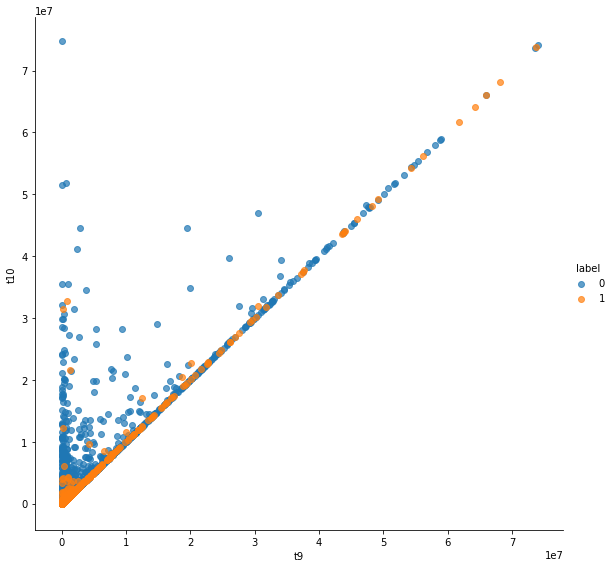

In [21]:
import seaborn as sns
feat1='t9'
feat2='t10'
p1=np.array(data[feat1]).reshape(1,-1)
p2= np.array(data[feat2]).reshape(1,-1)
new_data = np.vstack((p1,p2,np.array(y).reshape(1,-1))).T
new_df = pd.DataFrame(data = new_data,columns=(feat1,feat2,'label'))
sns.FacetGrid(new_df,hue='label',height = 8).map(plt.scatter,feat1,feat2,alpha=0.7).add_legend()